In [48]:
#Import Libraries
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for data preprocessing
from sklearn.preprocessing import Imputer

In [49]:
#Load diamond data
diamond_data = pd.read_csv("diamonds_data.csv")
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Basic Information about the data:
1. Carat: carat weight of a diamond

2. Cut: Different categories of quality of a diamond cut; Ideal, Premium, Good, Very Good etc

3. Color: describes the color of a diamond

4. Clarity: describes different categories of how flawless a diamond is

5. depth: describes the height of diamond, measured from top to bottom

6. table: Percentage of average diameter of a diamond; its width

7. price: price of a diamond

8. x: Length

9. y: width

10. z: height

In [50]:
#Information about diamond data
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [51]:
diamond_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26969.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13484.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26969.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40454.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53939.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Since x,y,z are dimensions of a diamond, their minimum values cannot be zero. That means there are zero values which needs to be taken care of.

In [52]:
#replacing 0 values with Nan
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53932 non-null float64
y             53933 non-null float64
z             53920 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### From the values its obeserved that very few values are missing. And such rows can be removed as its a large dataset. Removing these values will not result in losing important information

In [53]:
diamond_data.dropna(inplace=True)
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53920 non-null int64
carat         53920 non-null float64
cut           53920 non-null object
color         53920 non-null object
clarity       53920 non-null object
depth         53920 non-null float64
table         53920 non-null float64
price         53920 non-null int64
x             53920 non-null float64
y             53920 non-null float64
z             53920 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


#### No missing values are observed now

In [54]:
#dropping unneccesary columns
diamond_data = diamond_data.drop(['Unnamed: 0'],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Question: function to extract data into multiple csv files based on column input

## Created two versions of code:
1. Function which overwrites existing file
2. Function which creates a new version of a file and maintains the old one.

#### # First Approach: The below code creates a new file OR overwrites the already existing file. Hence, the file get updated with the new data and does not create different versions of the file.

In [55]:
#function to extract data into multiple csv files based on the input
def split_files(column_value):
    #finding the count of different factors within the input
    count = diamond_data[column_value].value_counts().count()
    for i in range(count):
        #grouped the data as per the input
        grouped_column = diamond_data.groupby(column_value)   
        #identifying each factor within the input
        factors = diamond_data[column_value].value_counts().index[i]
        #extracting data as per the factors
        categories = grouped_column.get_group(factors)
        #new csv files are created
        categories.to_csv("%s.csv" %factors)

In [56]:
#call the function
split_files('cut')

#### Second Approach: Similar function as above. However, the below code creates a new file if the file is already present. This can be implemented when there is a need to compare the previous and current data. So different versions of files are created

In [57]:
#function to extract data into multiple csv files based on the input
import glob
def split_files(column_value):
    count = diamond_data[column_value].value_counts().count()
    for i in range(count):
        grouped_column = diamond_data.groupby(column_value)   
        factors = diamond_data[column_value].value_counts().index[i]
        categories = grouped_column.get_group(factors)
        files = "%s.csv" %factors
        files_exist = glob.glob(files)
        if not files_exist:
            print("Files Created")
            categories.to_csv("%s.csv" %factors)
        else:
            print("File already exists! Creating a new version.")
            categories.to_csv("%s_new.csv" %factors)

In [58]:
#call the function
split_files('color')

File already exists! Creating a new version.
File already exists! Creating a new version.
File already exists! Creating a new version.
File already exists! Creating a new version.
File already exists! Creating a new version.
File already exists! Creating a new version.
File already exists! Creating a new version.


# Question: What are the primary drivers of price? (show your work)

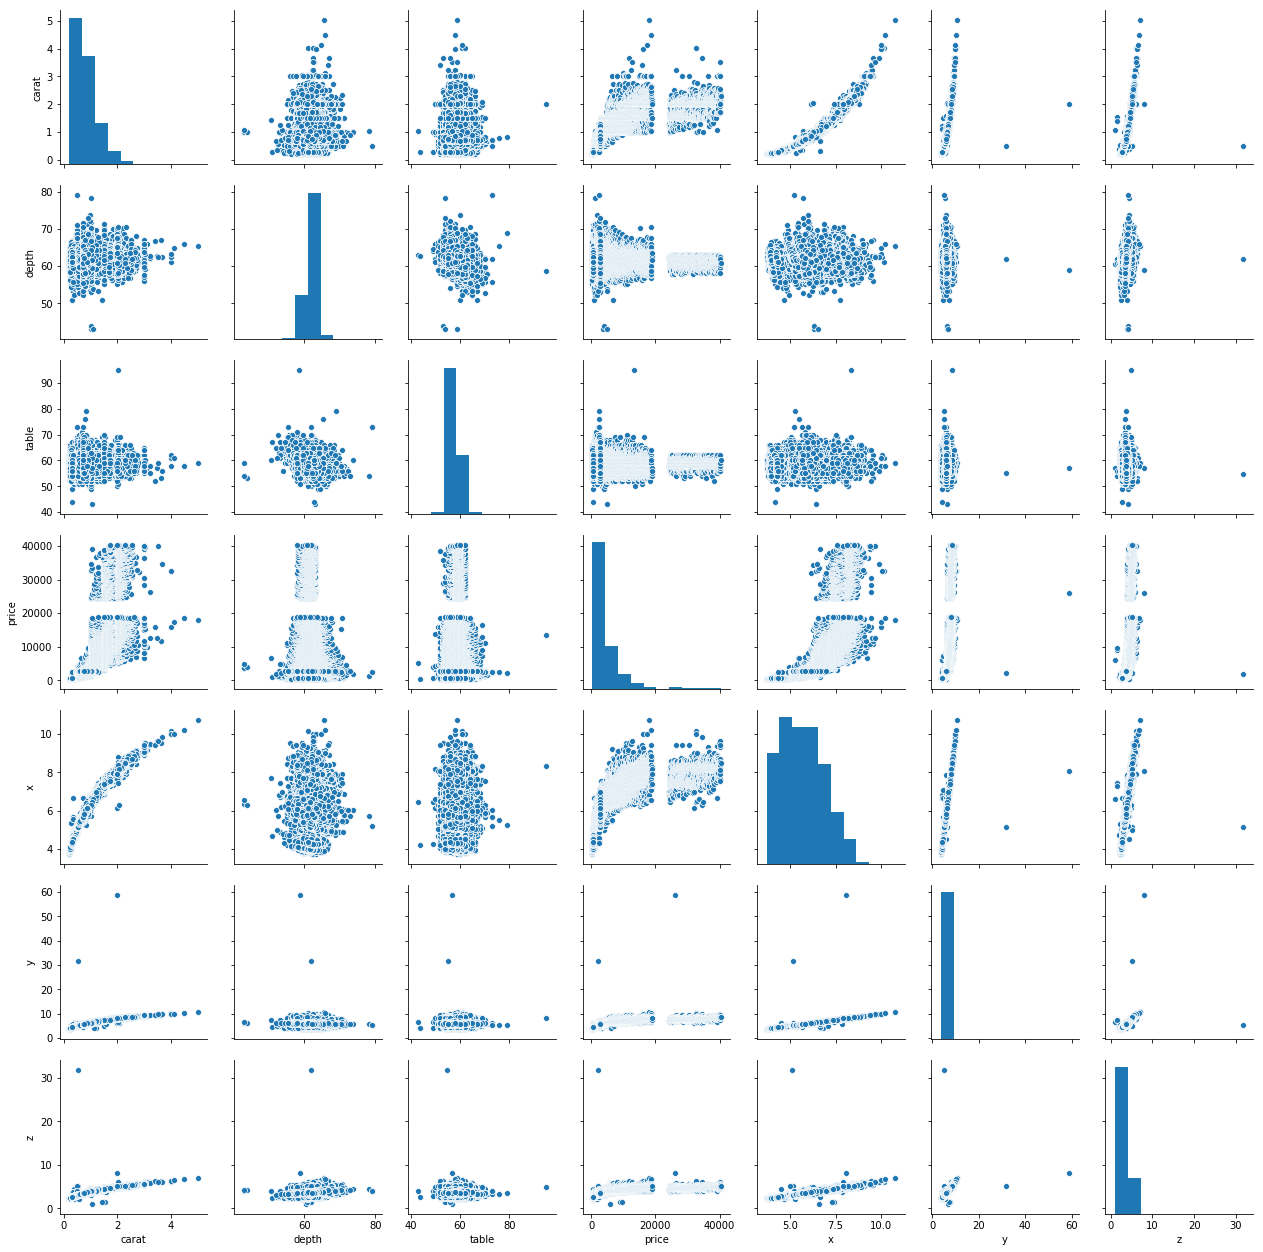

In [67]:
#Primary drivers of price
# without regression
sns.pairplot(diamond_data,kind="scatter" )
plt.show()

#### From the above plot below points were observed:

1. Considering the graphs, carat weight is highly correlated to price. As the carat weight increases, the price of a diamond increases.
2. There is also a positive correlation amongst length, width and height of a diamond against its price. as one of the values increase, the price increases
3. Table and depth hardly contribute to the price of a diamond

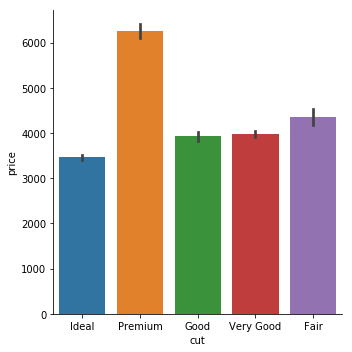

In [30]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
categorical_data_cut = sns.factorplot(x='cut',y='price', data=diamond_data , kind='bar')

#### The above figure depicts that a diamond with Premium and Fair cut has the most highest prices whereas Ideal cut has the lowest price of all

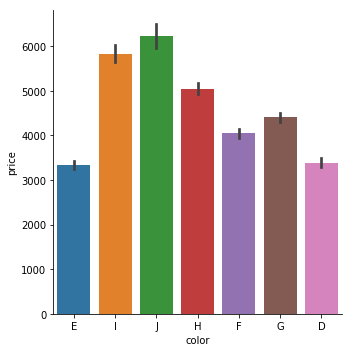

In [31]:
categorical_data_color = sns.factorplot(x='color',y='price', data=diamond_data , kind='bar')

#### Looks like J color has the highest price of all and is the best color

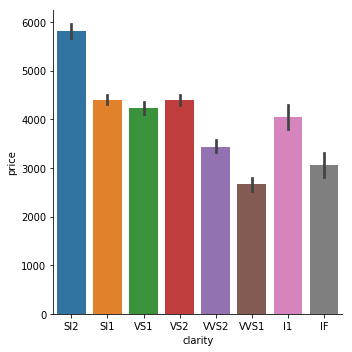

In [32]:
categorical_data_clarity = sns.factorplot(x='clarity',y='price', data=diamond_data , kind='bar')

### Feature Selection:
1. Found out the highly correlated predictors. Since both the features contribute same variance, one of the features can be removed. Using a threshold of 0.5, features whose correlation is greater than 0.5, are considered as important features

In [35]:
correlation_table = diamond_data.corr()
#Correlation with output variable
response_var = abs(correlation_table["price"])
#Selecting highly correlated features
imp_features = response_var[response_var>0.5]
imp_features

carat    0.819056
price    1.000000
x        0.769495
y        0.752183
z        0.748132
Name: price, dtype: float64

#### All the features were checked with every other feature and its correlation value was calculated. Based on the correlation table values, highly correlated predictors were removed and important features were considered.

#### We can see that only Carat, length, width, height variables are driving factors of price. Hence there is no need to consider rest of the features for determining the price of a diamond

### Question: Create a dataframe of just Fair cut, with a carat less than .25, and give me the sum of price, and average depth, grouped by color.

In [11]:
#dataframe of Fair cut, with a carat less than .25
fair_carat = diamond_data[(diamond_data['cut'] == 'Fair') & (diamond_data['carat'] < 0.25)]
fair_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
31611,0.23,Fair,G,VVS2,61.4,66.0,369,3.87,3.91,2.39


In [59]:
#Sum of Price of a diamond grouped by color
pd.DataFrame(fair_carat.groupby('color')['price'].sum())

,price
color,
E,337
G,369


In [60]:
#Average depth of a diamond grouped by color
pd.DataFrame(fair_carat.groupby('color')['depth'].mean())

,depth
color,
E,65.1
G,61.4


### Question:  Change the price of all diamonds whose cut is Premium and who whose price is in the top 10% of Premium to be 14% higher. (make sure you've completed the primary drivers of price question before changing the dataframe)

In [61]:
#extracted rows only of Premium Data of Cut column
premium_data = diamond_data[diamond_data.cut == 'Premium']
premium_data.shape

(13780, 10)

In [62]:
#Calculated the top 10% of price of Premium
a = np.percentile(premium_data['price'],90)

In [63]:
#created a new dataframe consisting only of top 10% Premium price of diamonds
new_data = premium_data[premium_data['price']> a]
new_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
23405,1.30,Premium,F,VS1,62.5,58.0,11392,6.97,6.94,4.35
23406,1.21,Premium,E,VVS2,61.9,58.0,11395,6.84,6.79,4.22
23410,1.67,Premium,I,VS1,61.1,58.0,11400,7.69,7.60,4.67
23420,1.53,Premium,H,VS1,60.8,59.0,11413,7.41,7.36,4.49
23421,2.00,Premium,F,SI2,61.5,59.0,11413,8.03,7.95,4.92


In [64]:
#calculated a new price which has increased to 14% from 10% of Premium cut
new_data['price'] = new_data['price'].add(new_data['price']*1.14)
new_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
23405,1.30,Premium,F,VS1,62.5,58.0,24378.88,6.97,6.94,4.35
23406,1.21,Premium,E,VVS2,61.9,58.0,24385.30,6.84,6.79,4.22
23410,1.67,Premium,I,VS1,61.1,58.0,24396.00,7.69,7.60,4.67
23420,1.53,Premium,H,VS1,60.8,59.0,24423.82,7.41,7.36,4.49
23421,2.00,Premium,F,SI2,61.5,59.0,24423.82,8.03,7.95,4.92


In [65]:
#updated the new values in the original dataset
diamond_data.update(new_data)
#Below values can be observed as the updated ones than the original Premium values
diamond_data.iloc[23396:23402]

,carat,cut,color,clarity,depth,table,price,x,y,z
23405,1.30,Premium,F,VS1,62.5,58.0,24378.88,6.97,6.94,4.35
23406,1.21,Premium,E,VVS2,61.9,58.0,24385.30,6.84,6.79,4.22
23407,1.50,Good,F,SI1,60.5,62.0,11399.00,7.32,7.38,4.45
23408,2.00,Good,I,SI2,64.2,52.0,11400.00,7.91,7.88,5.07
23409,1.01,Ideal,E,VVS2,61.7,57.0,11400.00,6.42,6.44,3.97
23410,1.67,Premium,I,VS1,61.1,58.0,24396.00,7.69,7.60,4.67


### Question: Create 3 meaningful visualizations from the dataset

#### As per my understanding, for all the below questions the dataframe with updated price values has been considered.

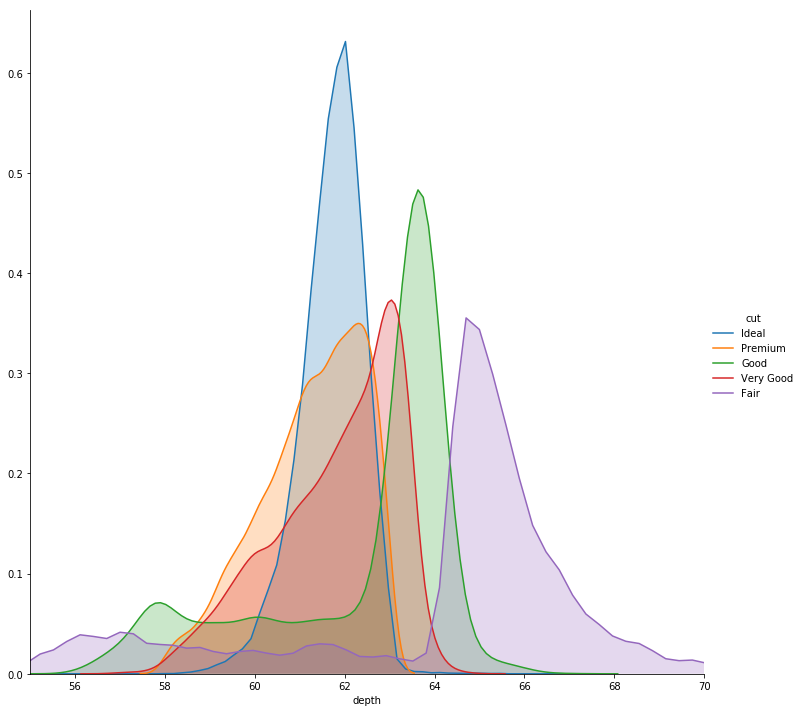

In [66]:
#Visualization 1
sns.FacetGrid(diamond_data, 
             hue='cut', 
             size=10, 
             xlim=(55, 70)).map(sns.kdeplot, 'depth', shade=True).add_legend()


#### From the grpah, it can be said that Ideal diamond cut has the highest depth around 62

Text(0.5, 1.0, 'Price distribution')

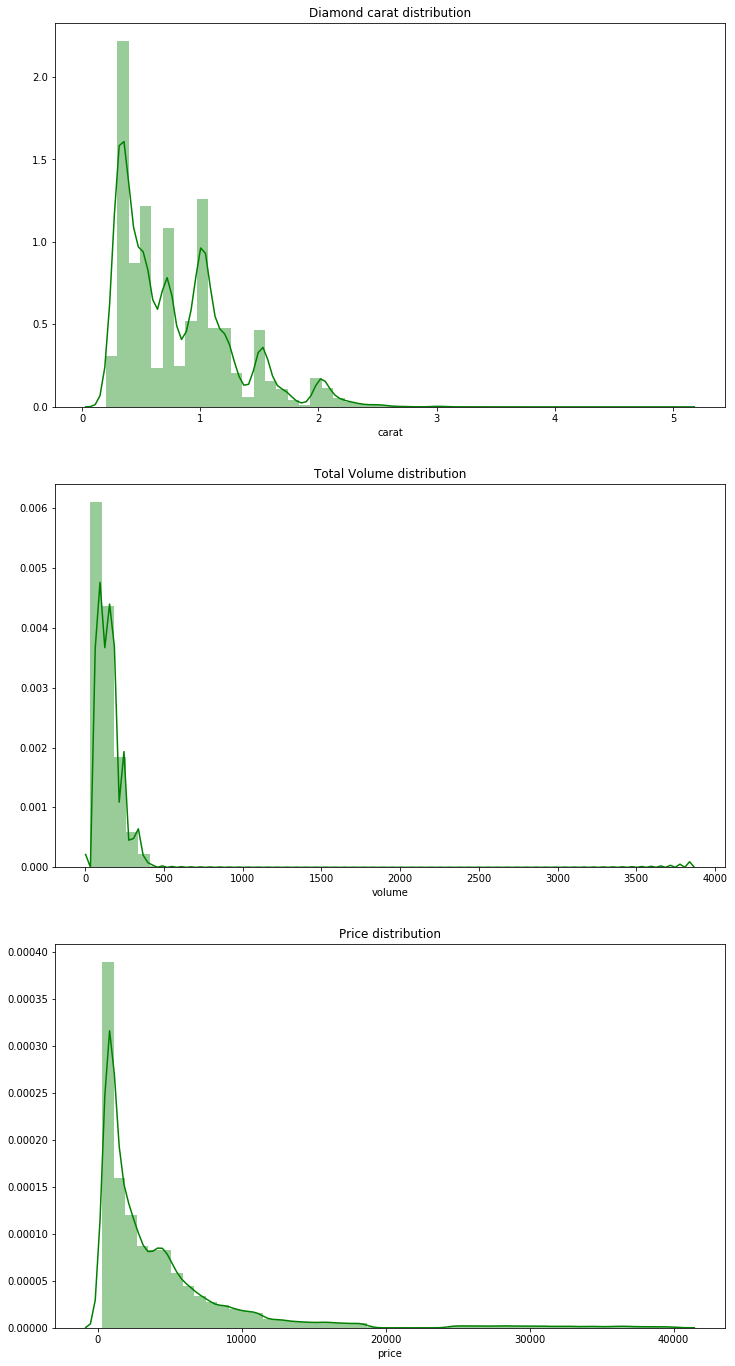

In [70]:
#Visualization 2
diamond_data['volume'] = diamond_data['x']*diamond_data['y']*diamond_data['z']
f, ax = plt.subplots(3, figsize=(12,24))
sns.distplot(diamond_data.carat,color='green',ax=ax[0])
sns.distplot(diamond_data.volume,color='green',ax=ax[1])
sns.distplot(diamond_data.price,color='green',ax=ax[2])
ax[0].set_title('Diamond carat distribution')
ax[1].set_title('Total Volume distribution')
ax[2].set_title('Price distribution')

#### From the above graphs, following observations were made:
1. Most of the diamonds were below carat 2
2. The highest volume in this data showed a maximum volume less than 500cubic metres
3. Most prices in the dataset were below 10k

Text(0.5, 1.0, 'Color vs Price')

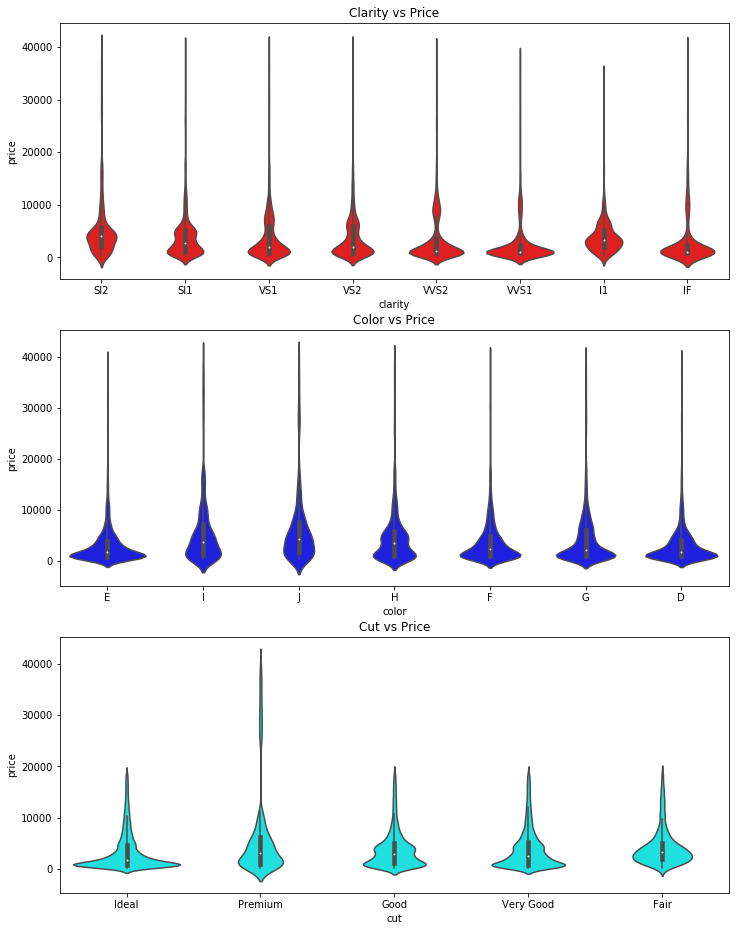

In [71]:
#Visualization 3
f, ax = plt.subplots(3,figsize=(12,16))
sns.violinplot(x='clarity',y='price',data=diamond_data,ax=ax[0], color="red")
sns.violinplot(x='color',y='price',data=diamond_data,ax=ax[1], color="blue")
sns.violinplot(x='cut',y='price',data=diamond_data,ax=ax[2], color="cyan")
ax[0].set_title('Clarity vs Price')
ax[2].set_title('Cut vs Price')
ax[1].set_title('Color vs Price')


#### In violin plot, thicker the part means values in that section has higher frequency. Violin plots considers all the data points in the dataset unlike bar graphs with mean and error bars

It is observed that Premium cut has the highest price
For color E, most of its values are less than $10k

### Question: filter down the dataset to only groups of cut + color + price whose mean price is under $2k.

In [24]:
#As per the question, mean price below 2k was required. 
#As per my calculations, I did not have any values less than $2k. hence considered mean price less than $4k
dataset = pd.DataFrame(diamond_data.groupby(['cut','color'])['price'].mean())
final = dataset[dataset['price']<4000]
final

price
cut       color             
Fair      E      3682.312500
          F      3827.003205
Good      D      3405.382175
          E      3423.644159
          F      3498.761852
Ideal     D      2629.094566
          E      2597.550090
          F      3374.526536
          G      3718.469070
          H      3889.334831
Very Good D      3470.467284
          E      3214.652083
          F      3778.820240
          G      3872.753806